# **Problem Statement**

## Business Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62 bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert

## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.

* **ID**: ID of the lead.
* **age**: Age of the lead.
* **current_occupation**: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'.
* **first_interaction**: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'.
* **profile_completed**: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%).
* **website_visits**: How many times has a lead visited the website.
* **time_spent_on_website**: Total time spent on the website in seconds.
* **page_views_per_visit**: Average number of pages on the website viewed during the visits.
* **last_activity**: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc.
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc.
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc.

* **print_media_type1**: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* **print_media_type2**: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* **digital_media**: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* **educational_channels**: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* **referral**: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* **status**: Flag indicating whether the lead was converted to a paid customer or not.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Installing and Importing the Necessary libraries**

In [ ]:
#Installing the libraries with the specified versions
!pip install numpy==2.0.2 pandas==2.2.2 scikit-learn==1.6.1 matplotlib==3.10.0 seaborn==0.13.2 joblib==1.4.2 xgboost==2.1.4 requests==2.32.4 huggingface_hub==0.34.0 -q

**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# For splitting the dataset
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To create the pipeline
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline,Pipeline

# To tune different models and standardize
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder

# To serialize the model
import joblib

# os related functionalities
import os

# API request
import requests

# for hugging face space authentication to upload files
from huggingface_hub import login, HfApi

# **Loading the dataset**

In [ ]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Read the data
learn = pd.read_csv("/content/drive/MyDrive/AIML-UTAustin/Project 7_Model Deployment_ExtraaLearn/ExtraaLearn.csv")

In [ ]:
# copying data to another variable to avoid any changes to original data
data = learn.copy()

## **Overview of the dataset**

In [ ]:
# View the first 5 rows of the dataset
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [ ]:
# View the last 5 rows of the dataset
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


Understand the shape of the dataset

In [ ]:
data.shape

(4612, 15)

Check the data types of the columns for the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [ ]:
data.describe() # display the statistical features of the numeric values

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000
mean,46.201214,3.566782,724.011275,3.026126,0.298569
std,13.161454,2.829134,743.828683,1.968125,0.457680
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,148.750000,2.077750,0.000000
50%,51.000000,3.000000,376.000000,2.792000,0.000000
75%,57.000000,5.000000,1336.750000,3.756250,1.000000
max,63.000000,30.000000,2537.000000,18.434000,1.000000


In [ ]:
# Checking for duplicate values
data.duplicated().sum()

np.int64(0)

In [ ]:
# Dropping the duplicate values
data.drop_duplicates(inplace=True)

Dropping the unique values column

In [ ]:
# checking the number of unique values
data["ID"].nunique()

4612

In [ ]:
# Dropping the ID column first before we proceed forward
data=data.drop('ID',axis=1)

In [ ]:
data

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0


# **Exploratory Data Analysis**

**Let's check the statistical summary of the data**

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


In [ ]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
--------------------------------------------------
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
--------------------------------------------------
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
--------------------------------------------------
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64
--------------------------------------------------
print_media_type1
No     4115
Yes     497
Name: count, dtype: int64
--------------------------------------------------
print_media_type2
No     4379
Yes     233
Name: count, dtype: int64
--------------------------------------------------
digital_media
No     4085
Yes     527
Name: count, dtype: int64
--------------------------------------------------
educational_channels
No     3907
Yes     705
Name

**The below functions need to be defined to carry out the EDA.**

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0])

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

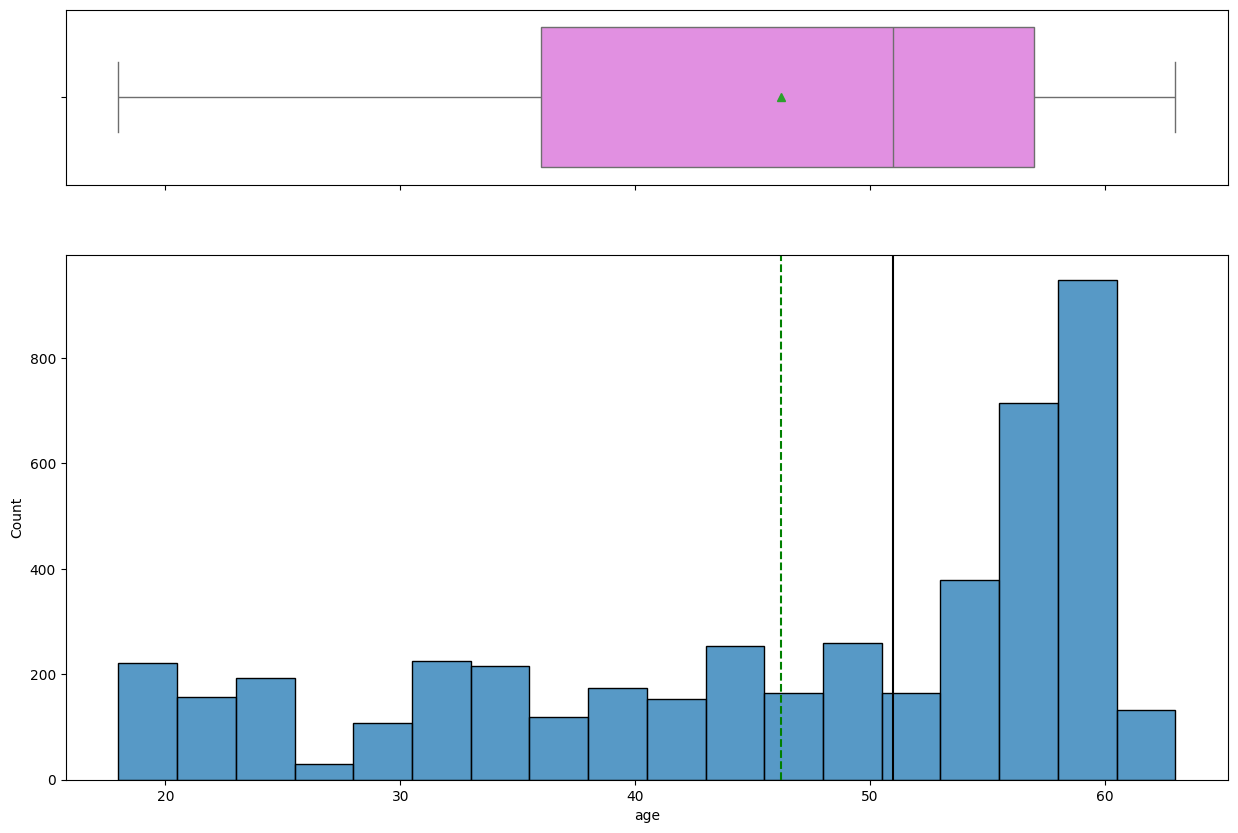

In [ ]:
#Observations on Age
histogram_boxplot(data, "age")

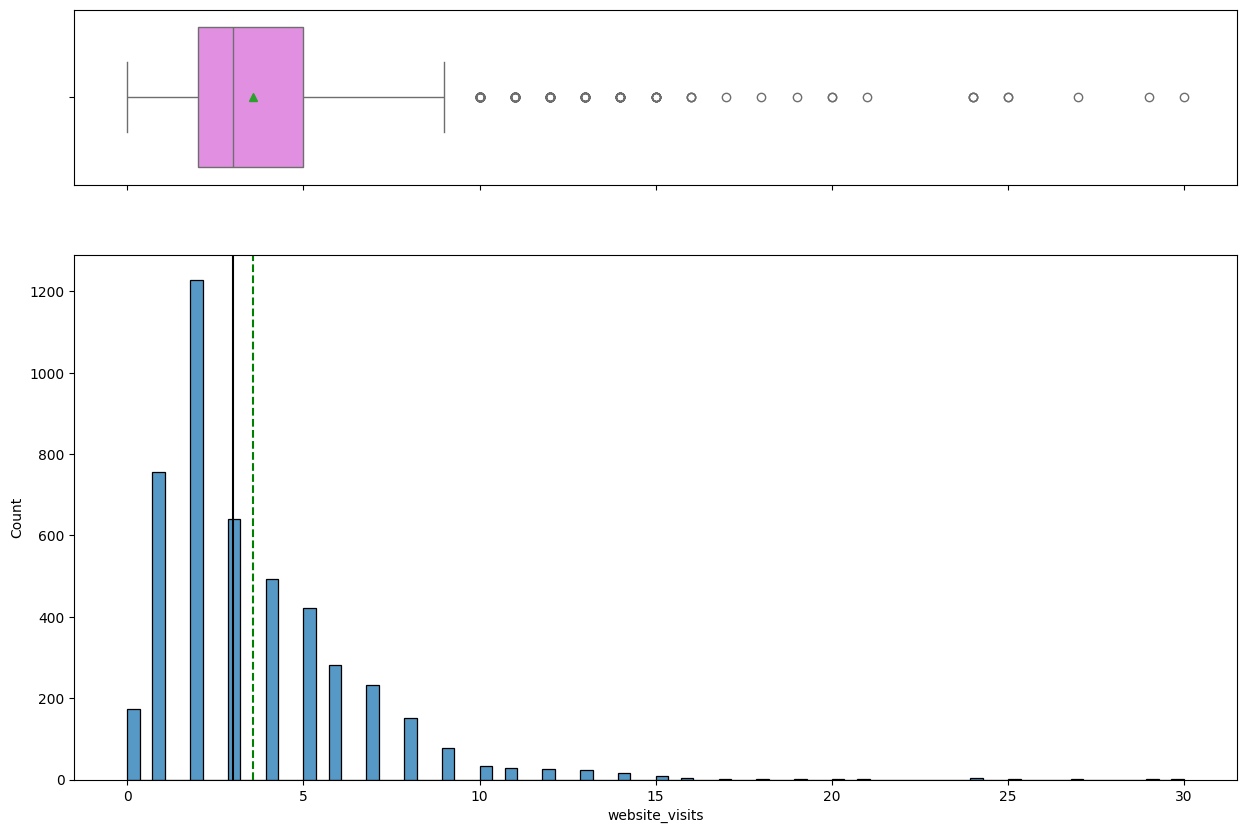

In [ ]:
#Observations on website_visits
histogram_boxplot(data, "website_visits")

In [ ]:
data[data["website_visits"] == 0].shape

(174, 14)

In [ ]:
data[data["website_visits"] == 0]

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
33,56,Professional,Mobile App,Medium,0,0,0.0,Phone Activity,No,No,No,No,No,0
37,59,Professional,Website,High,0,0,0.0,Email Activity,No,No,No,No,No,1
54,28,Professional,Mobile App,High,0,0,0.0,Email Activity,No,No,No,Yes,No,0
94,49,Unemployed,Website,High,0,0,0.0,Email Activity,Yes,No,No,No,No,1
127,54,Professional,Mobile App,High,0,0,0.0,Phone Activity,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4440,53,Professional,Mobile App,High,0,0,0.0,Email Activity,No,No,No,Yes,No,0
4447,38,Professional,Website,Medium,0,0,0.0,Email Activity,No,No,No,No,No,0
4453,56,Professional,Website,High,0,0,0.0,Phone Activity,No,No,No,No,No,1
4557,48,Unemployed,Mobile App,Medium,0,0,0.0,Email Activity,No,No,No,No,No,0


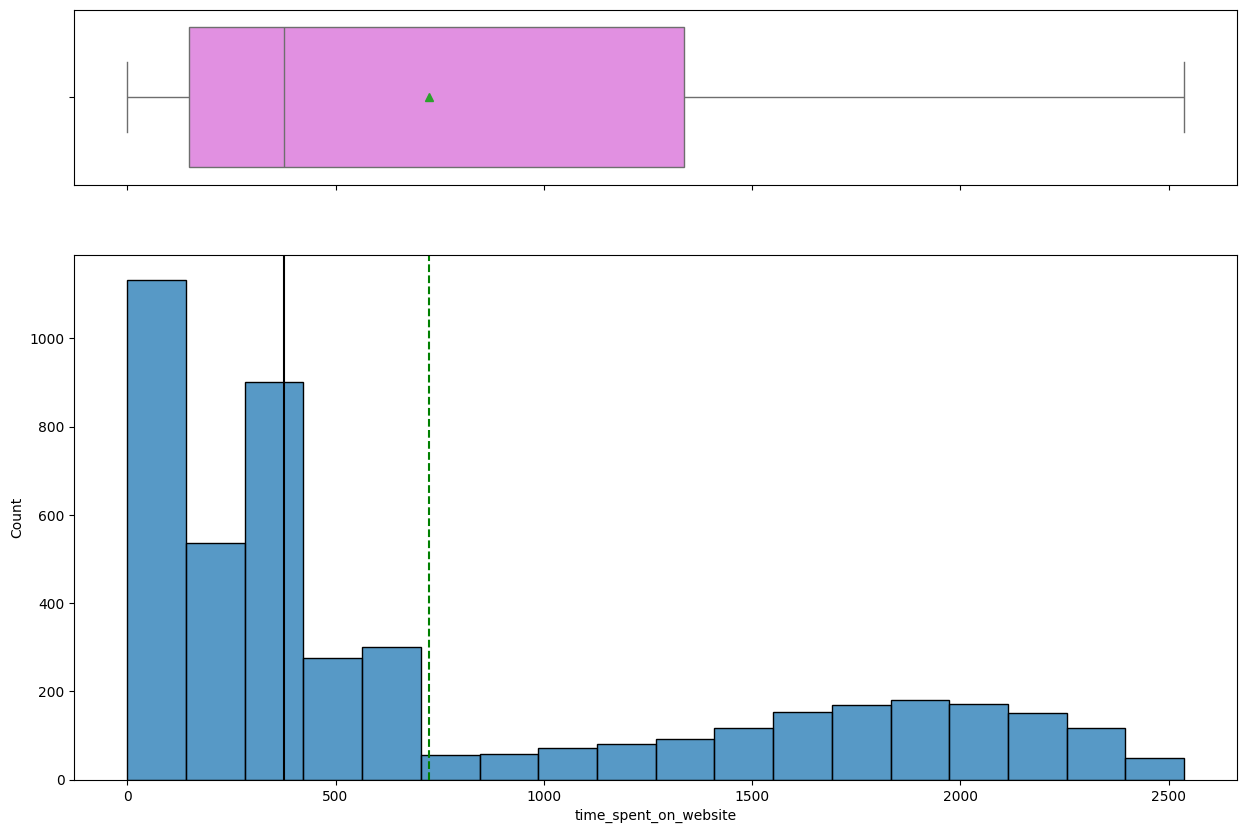

In [ ]:
# Observations on number of time_spent_on_website
histogram_boxplot(data, "time_spent_on_website")

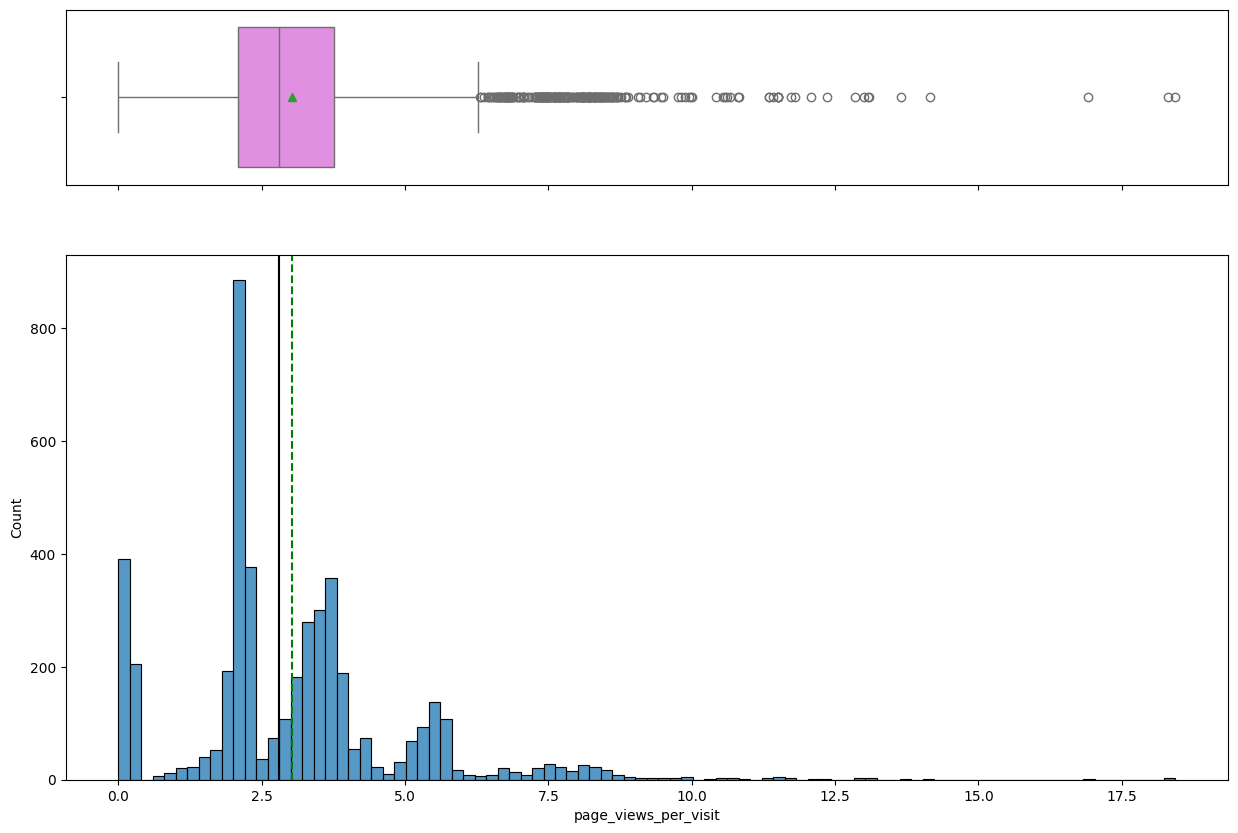

In [ ]:
# Observations on number of page_views_per_visit
histogram_boxplot(data, "page_views_per_visit")

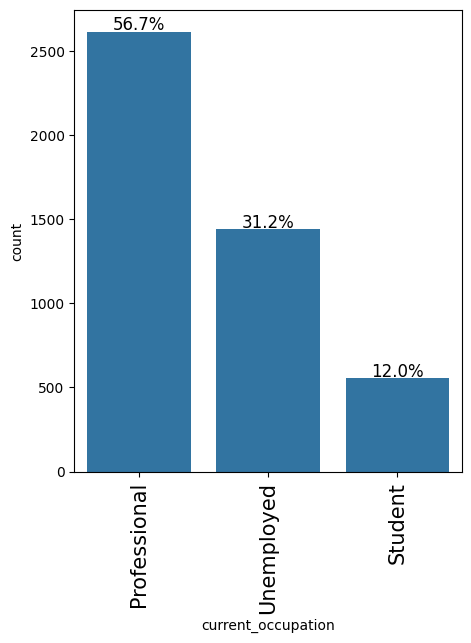

In [ ]:
# Observations on number of adults
labeled_barplot(data, "current_occupation", perc=True)

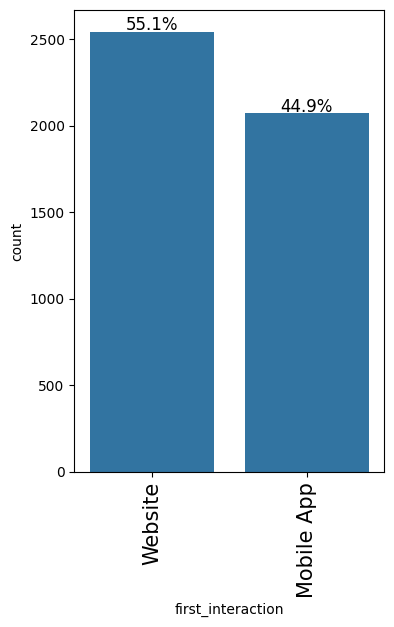

In [ ]:
# Observations on number of children
labeled_barplot(data, "first_interaction", perc=True)

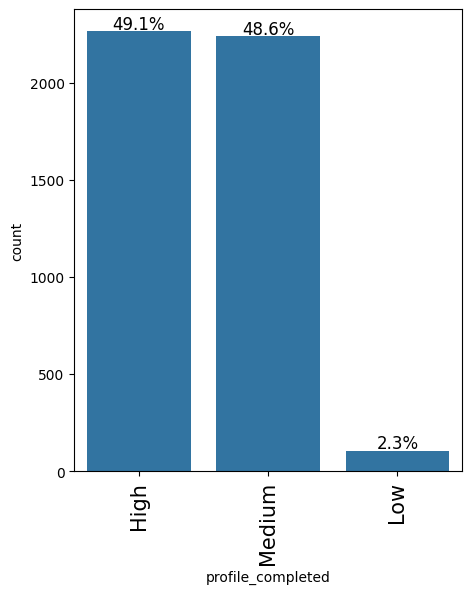

In [ ]:
# Observations on profile_completed
labeled_barplot(data, "profile_completed", perc=True)

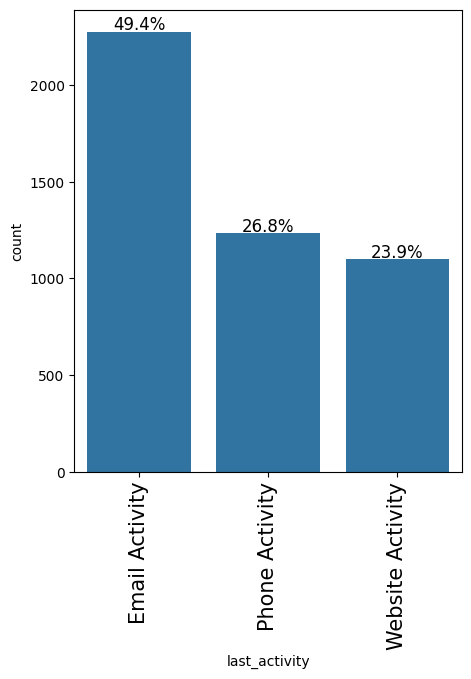

In [ ]:
# Observations on last_activity
labeled_barplot(data, "last_activity", perc=True)

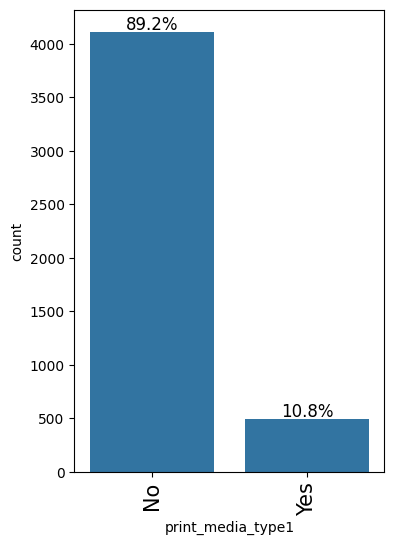

In [ ]:
# Observations on print_media_type1
labeled_barplot(data, "print_media_type1", perc=True)

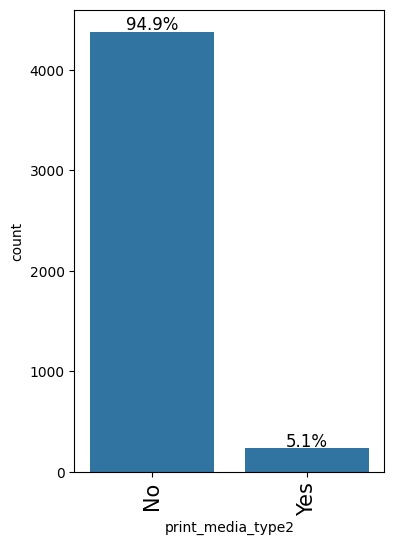

In [ ]:
# Observations on print_media_type2
labeled_barplot(data, "print_media_type2", perc=True)

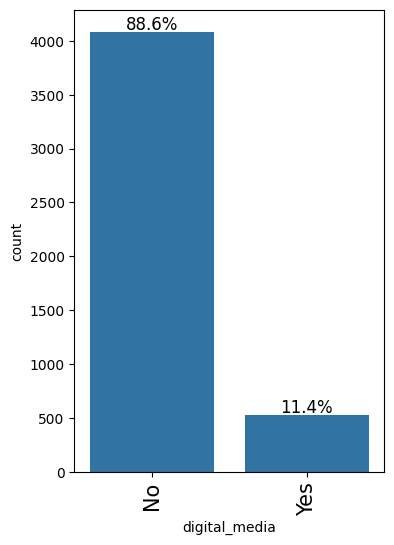

In [ ]:
# Observations on room type reserved
labeled_barplot(data, "digital_media", perc=True)

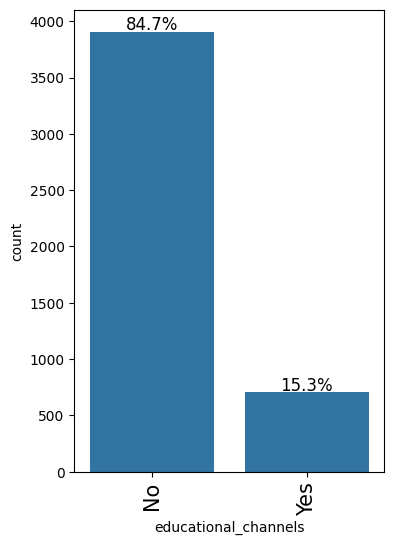

In [ ]:
# Observations on educational_channels
labeled_barplot(data, "educational_channels", perc=True)

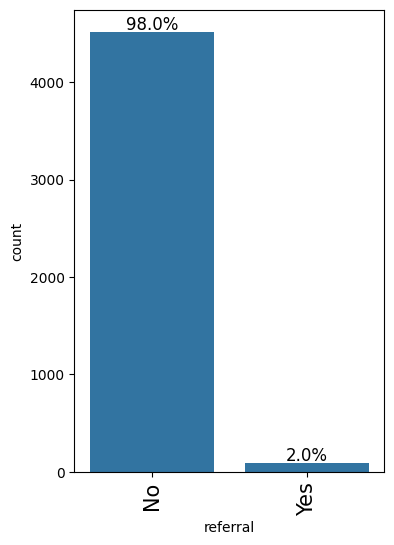

In [ ]:
# Observations on referral
labeled_barplot(data, "referral", perc=True)

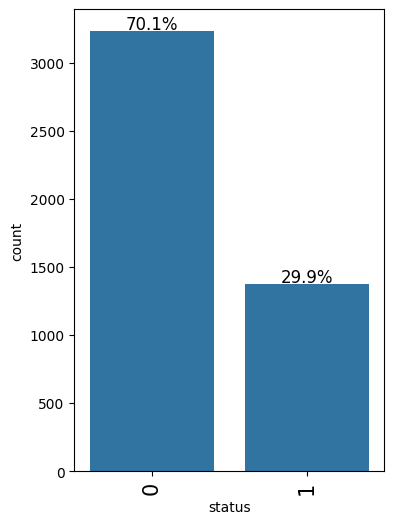

In [ ]:
# Observations on status
labeled_barplot(data, "status", perc=True)

### Bivariate Analysis

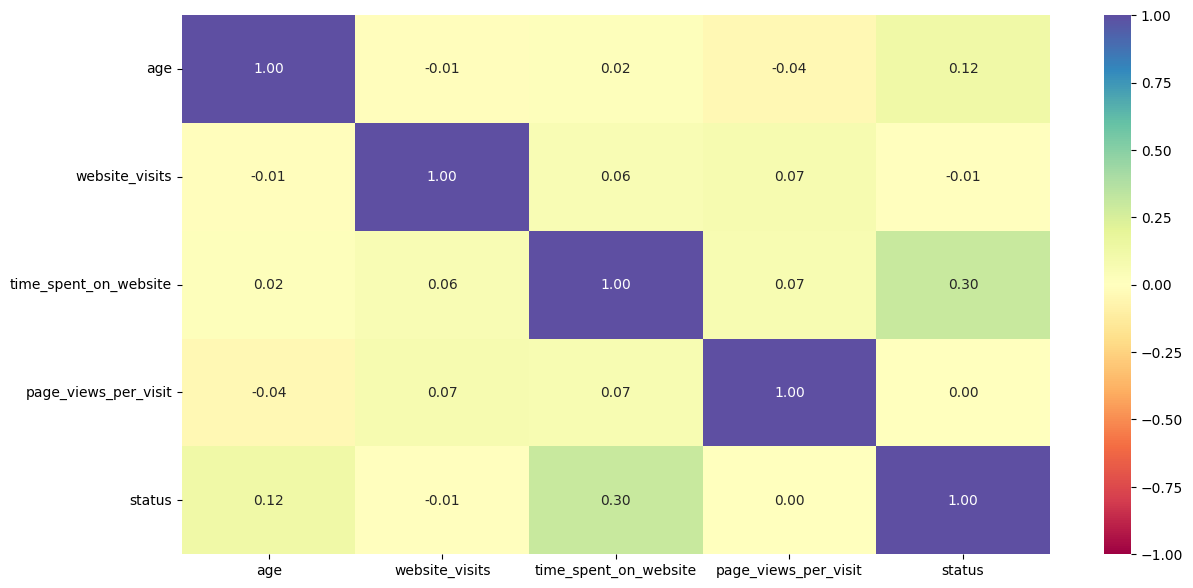

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(14, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Leads will have different expectations from the outcome of the course and the current occupation may play a key role for them to take the program. Let's analyze it**

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


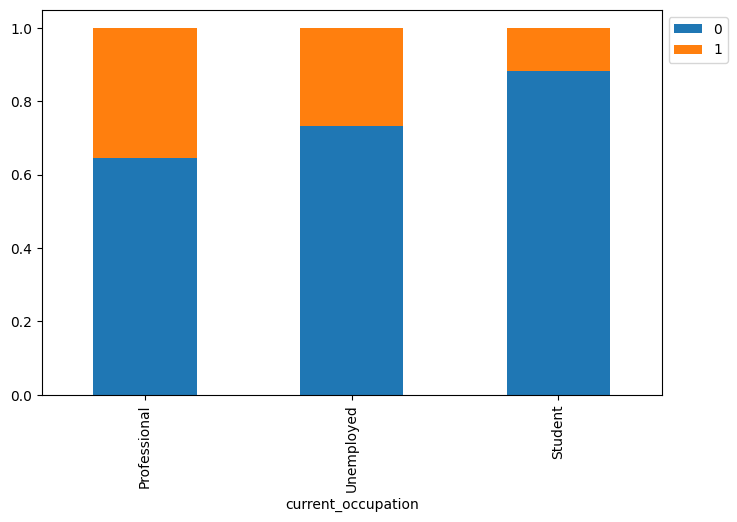

In [ ]:
stacked_barplot(data, "current_occupation", "status")

**Age can be a good factor to differentiate between such leads**

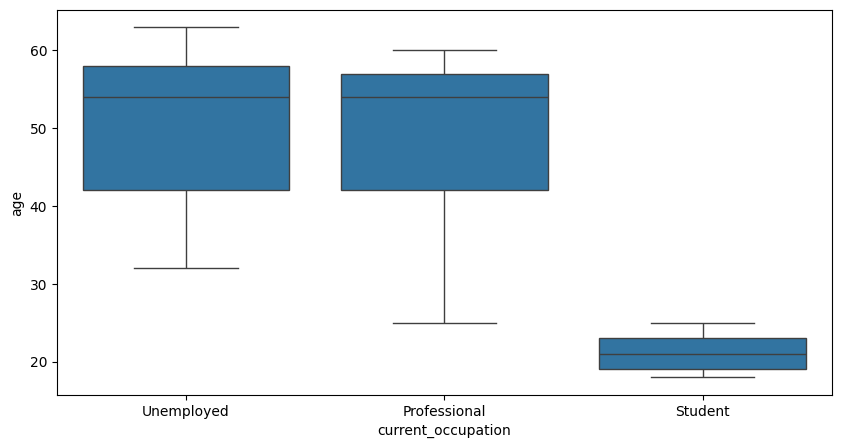

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data,x="current_occupation", y="age")
plt.show()

In [ ]:
data.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.0,49.347477,9.890744,25.0,42.0,54.0,57.0,60.0
Student,555.0,21.144144,2.001114,18.0,19.0,21.0,23.0,25.0
Unemployed,1441.0,50.140180,9.999503,32.0,42.0,54.0,58.0,63.0


**The company's first interaction with leads should be compelling and persuasive.  Let us see if the channels of the first interaction have an impact on the conversion of leads**

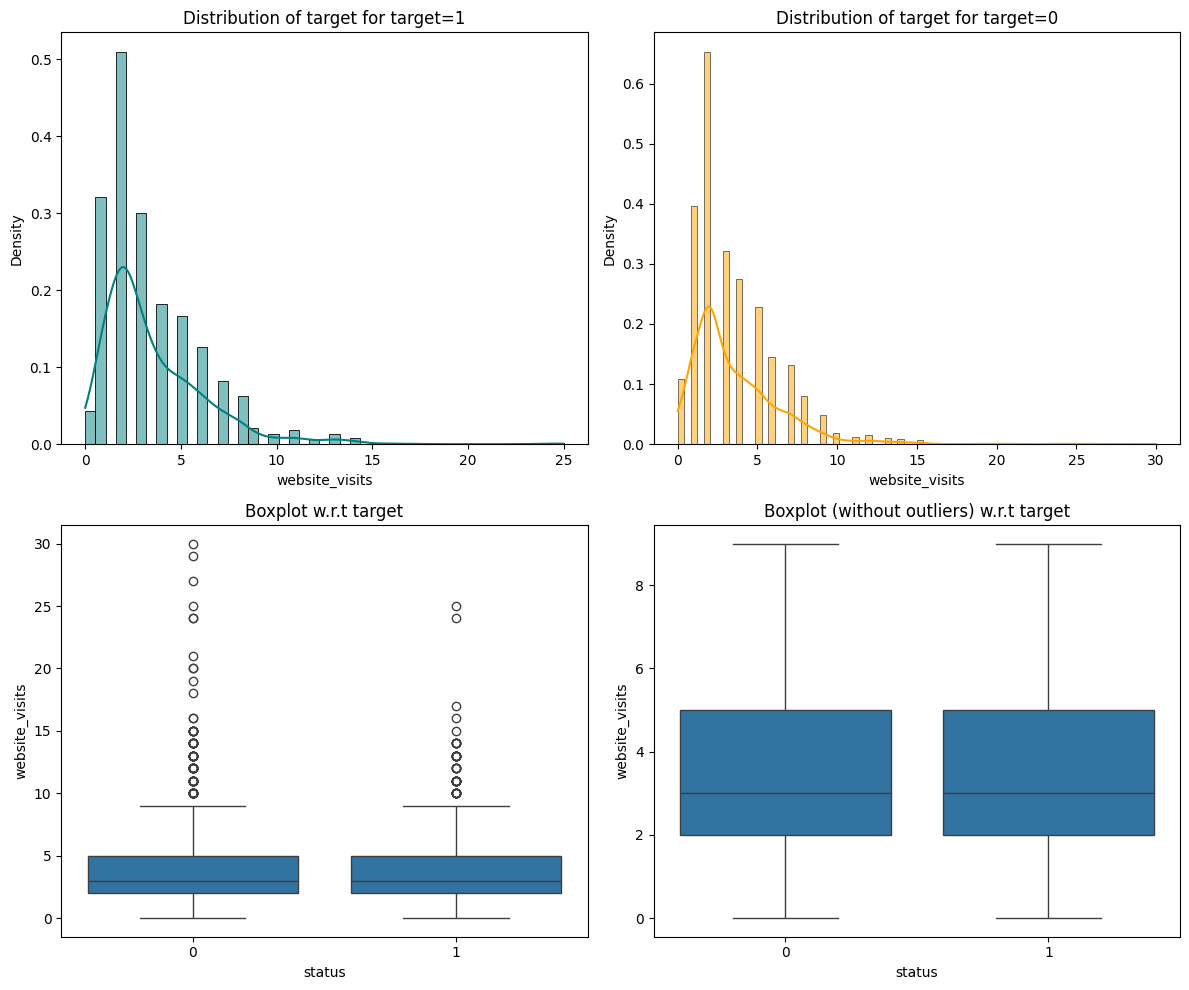

In [ ]:
# Plot the distribution plot between website_visits and status
distribution_plot_wrt_target(data, "website_visits", "status")

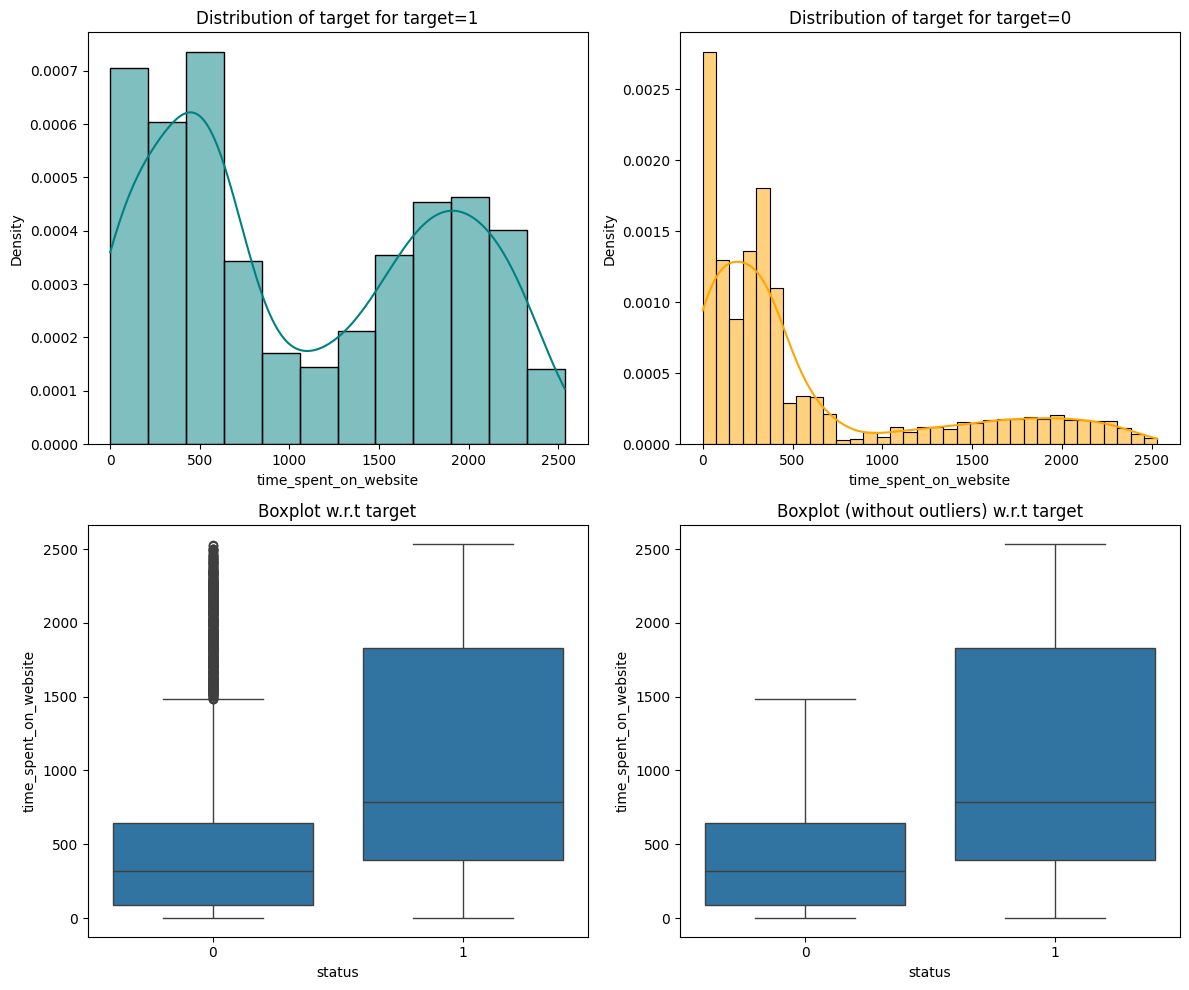

In [ ]:
distribution_plot_wrt_target(data, "time_spent_on_website", "status")

In [ ]:
# checking median value
data.groupby(["status"])["time_spent_on_website"].median()

,time_spent_on_website
status,
0,317.0
1,789.0


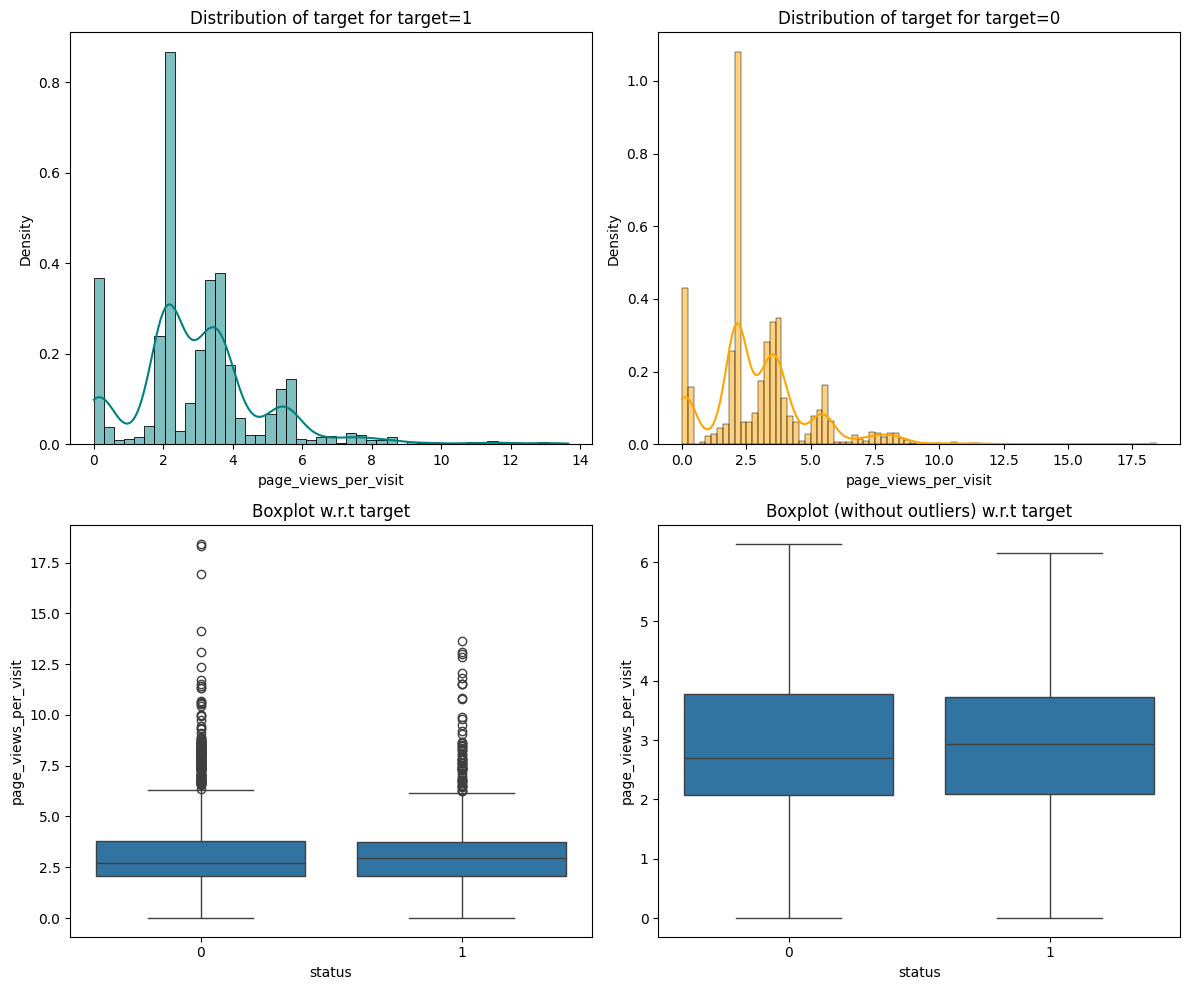

In [ ]:
# Plot the distribution plot between page_views_per_visit and status
distribution_plot_wrt_target(data, "page_views_per_visit", "status")

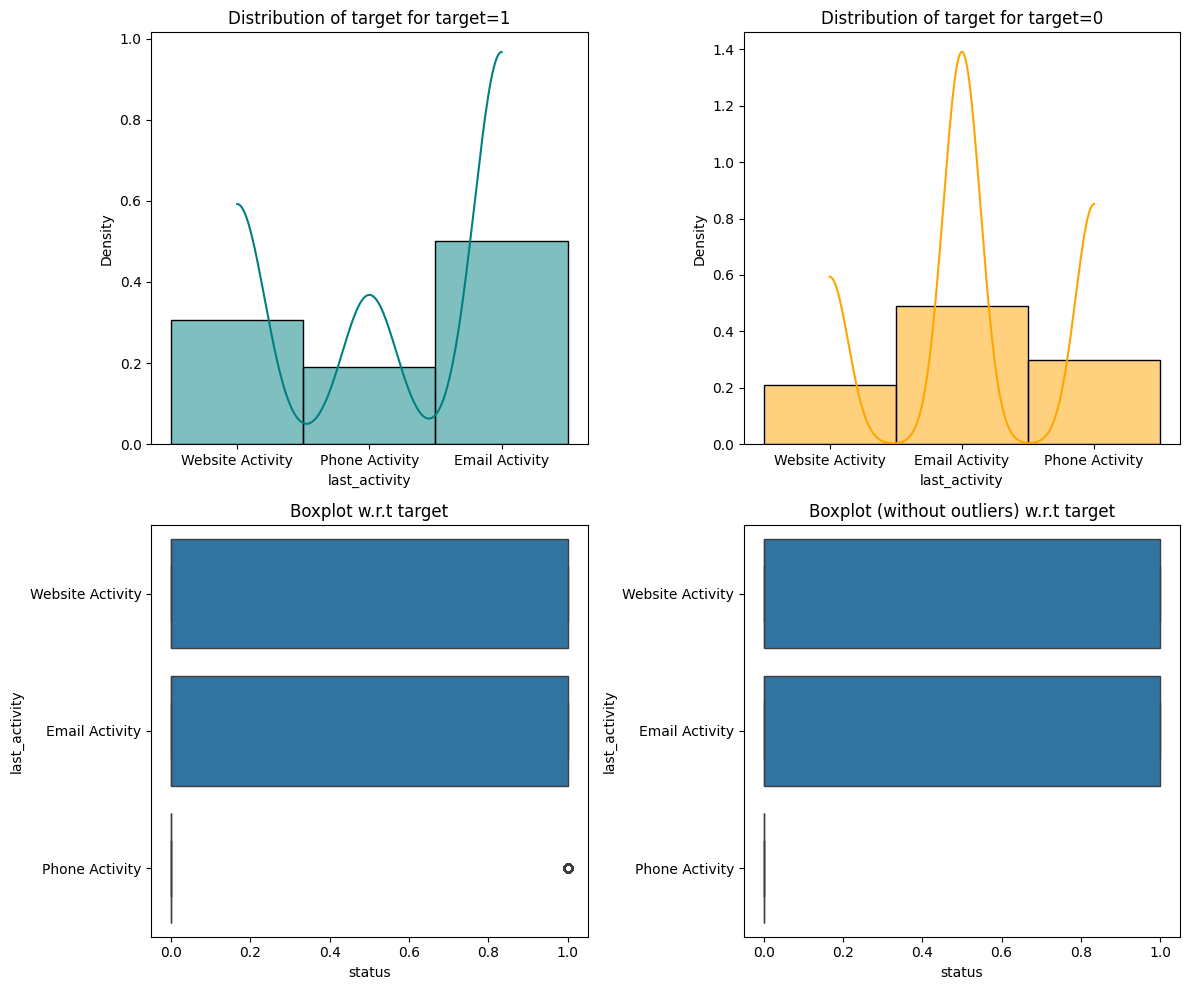

In [ ]:
# Plot the distribution plot between last_activity and status
distribution_plot_wrt_target(data, "last_activity", "status")

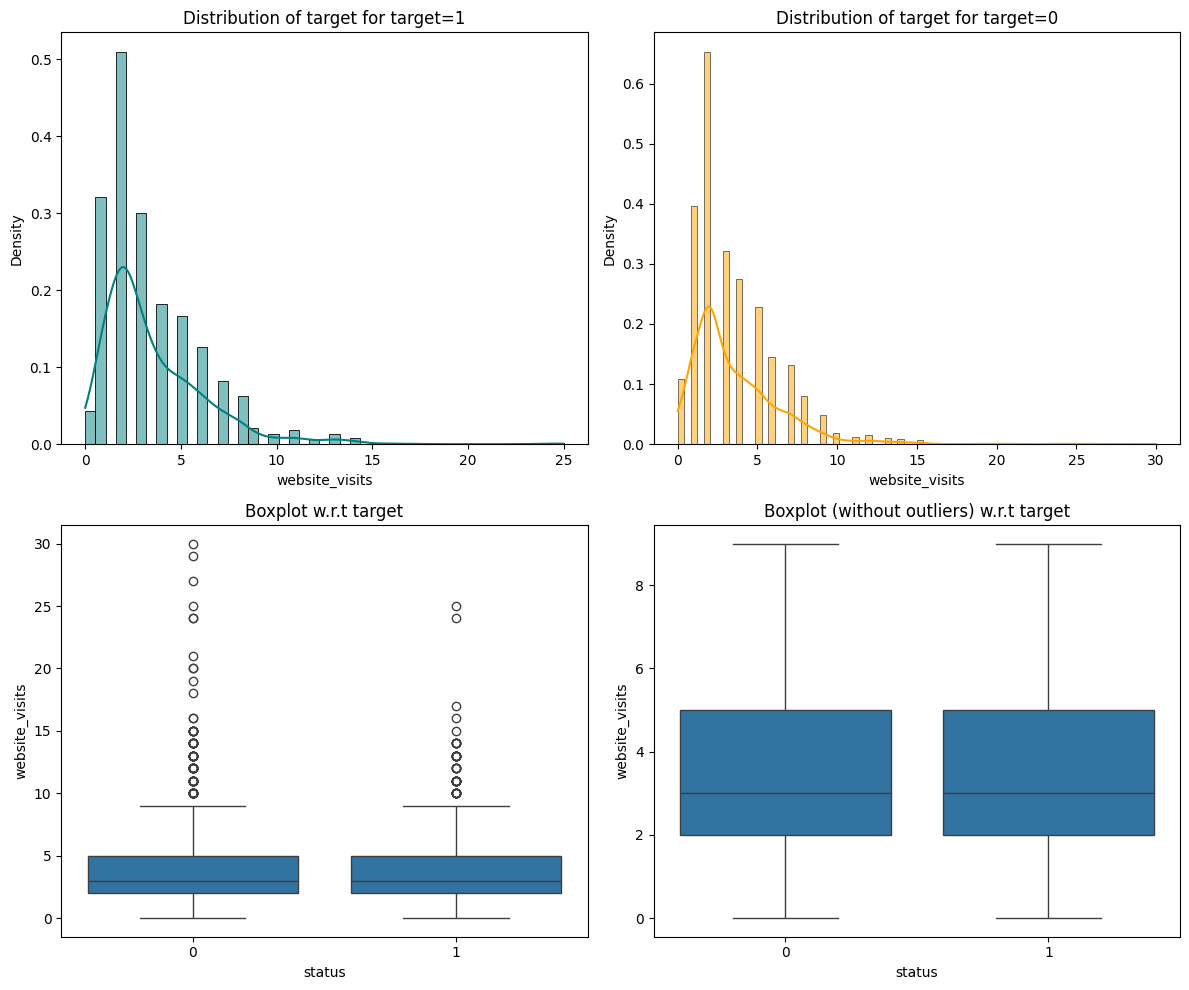

In [ ]:
# Plot the distribution plot between website_visits and status
distribution_plot_wrt_target(data, "website_visits", "status")

**People browsing the website or the mobile app are generally required to create a profile by sharing their personal details before they can access more information.  Let us see if the profile completion level has an impact on lead status**

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


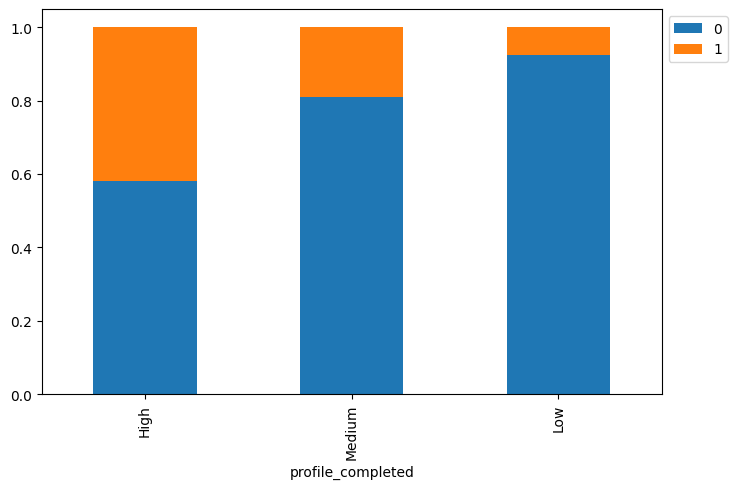

In [ ]:
stacked_barplot(data, "profile_completed", "status")

**After a lead shares their information by creating a profile, there may be interactions between the lead and the company to proceed with the process of enrollment.  Let us see how the last activity impacts lead conversion status**

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------


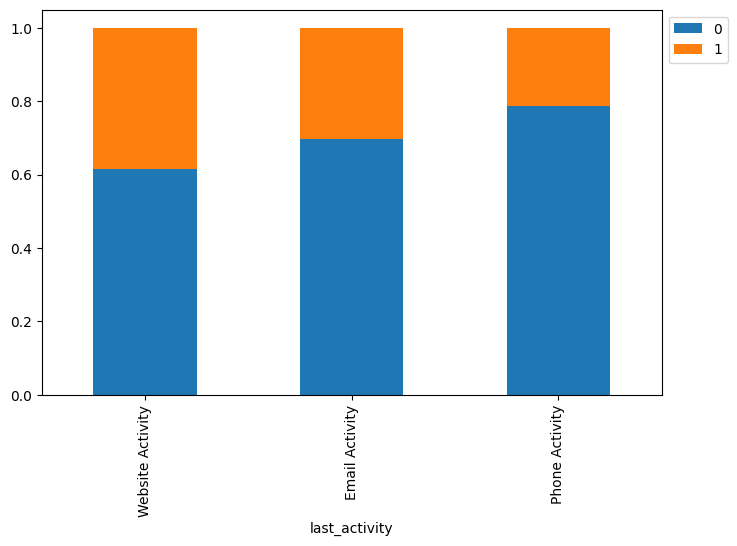

In [ ]:
stacked_barplot(data, "last_activity", "status")

**Let us see how advertisement and referrals impact the lead status**

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------


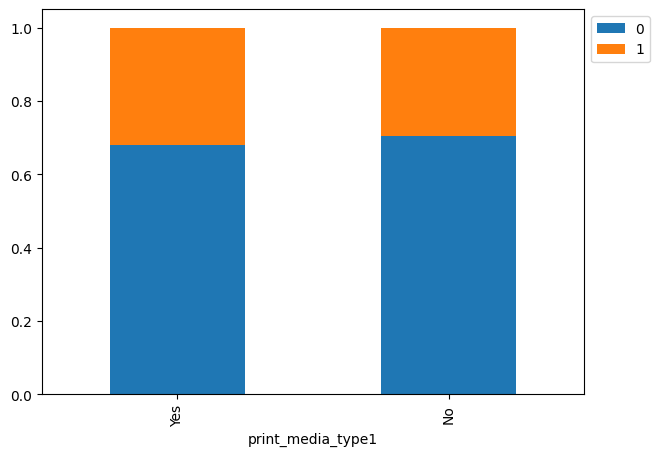

In [ ]:
stacked_barplot(data, "print_media_type1", "status")

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------


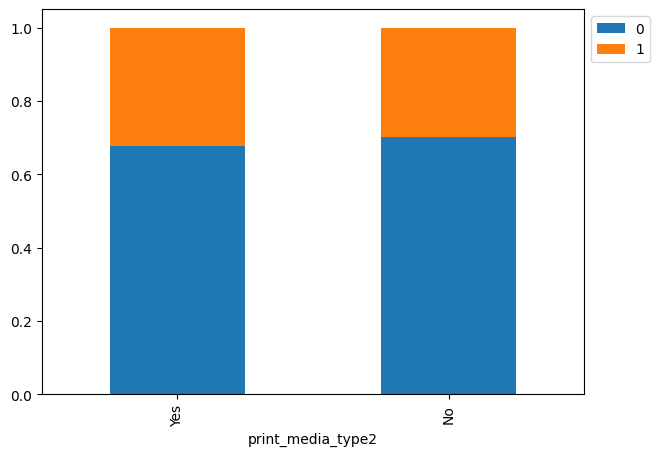

In [ ]:
stacked_barplot(data, "print_media_type2", "status")

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


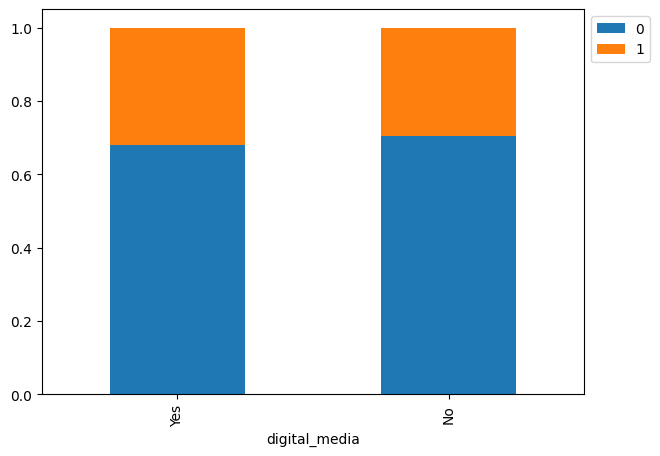

In [ ]:
stacked_barplot(data, "digital_media", "status")

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------


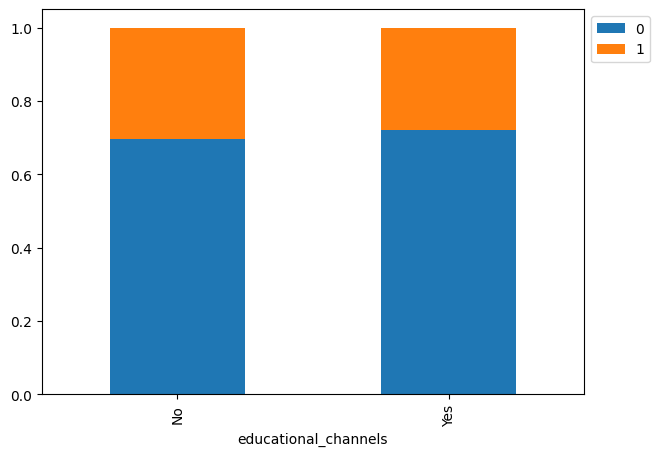

In [ ]:
stacked_barplot(data, "educational_channels", "status")

status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
------------------------------------------------------------------------------------------------------------------------


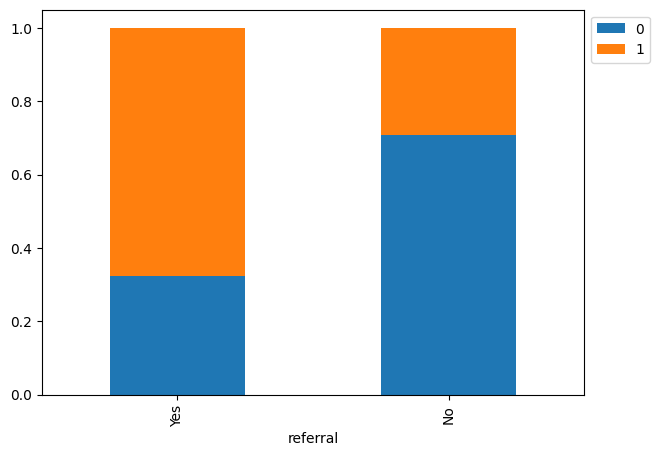

In [ ]:
stacked_barplot(data, "referral", "status")

# **Data Preprocessing**

## Outlier Check

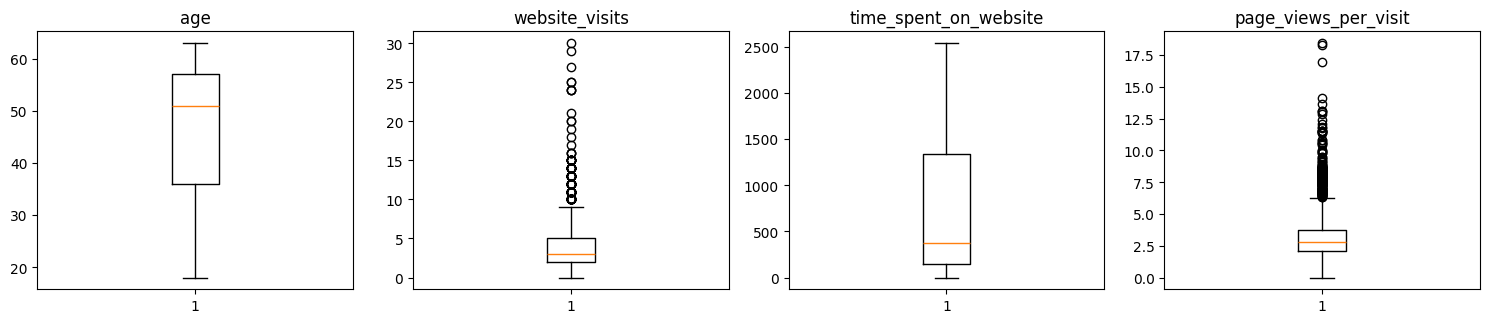

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

# dropping release_year as it is a temporal variable
numeric_columns.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Data Preparation for modeling

- We want to predict which lead is more likely to be converted.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
X = data.drop(["status"], axis=1)
Y = data["status"]

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=1
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)

print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))

print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3689, 13)
Shape of test set :  (923, 13)
Percentage of classes in training set:
status
0    0.704798
1    0.295202
Name: proportion, dtype: float64
Percentage of classes in test set:
status
0    0.687974
1    0.312026
Name: proportion, dtype: float64


## **Data Pre-processing Pipeline**

In [ ]:
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_features

['current_occupation',
 'first_interaction',
 'profile_completed',
 'last_activity',
 'print_media_type1',
 'print_media_type2',
 'digital_media',
 'educational_channels',
 'referral']

In [ ]:
# Create a preprocessing pipeline for the categorical features

preprocessor = make_column_transformer(
    (Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore'))]), categorical_features)
)

# **Model Building**

## Model Evaluation Criterion

- Mention the evaluation metric along with the reasoning

## Define functions for Model Evaluation

*   We'll fit different models on the train data and observe their performance.
*   We'll try to improve that performance by tuning some hyperparameters available for that algorithm.
*   We'll use GridSearchCv for hyperparameter tuning and an appropriate evaluation metric to optimize the model.
*   Let's start by creating a function to get model scores, so that we don't have to use the same codes repeatedly.

In [ ]:
# Function to compute different metrics to check performance of a classification model
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classifier model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

## Random Forest Model

In [ ]:
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator = make_pipeline(preprocessor,rf_estimator)
rf_estimator.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['current_occupation',
                                                   'first_interaction',
                                                   'profile_completed',
                                                   'last_activity',
                                                   'print_media_type1',
                                                   'print_media_type2',
                                                   'digital_media',
                                                   'educational_channels',
                                                   'referral'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=1))])

### Checking model performance on training set

In [ ]:
rf_estimator_model_train_perf = model_performance_classification(
    rf_estimator, X_train, y_train
)
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.828951,0.647383,0.740546,0.690838


### Checking model performance on test set

In [ ]:
rf_estimator_model_test_perf = model_performance_classification(
    rf_estimator, X_test, y_test
)
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.793066,0.572917,0.708155,0.633397


## AdaBoost Classifier

In [ ]:
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier = make_pipeline(preprocessor,ab_classifier)
ab_classifier.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['current_occupation',
                                                   'first_interaction',
                                                   'profile_completed',
                                                   'last_activity',
                                                   'print_media_type1',
                                                   'print_media_type2',
                                                   'digital_media',
                                                   'educational_channels',
                                                   'referral'])])),
                ('adaboostclassifier', AdaBoostClassifier(random_state=1))])

### Checking model performance on training set

In [ ]:
ab_classifier_model_train_perf = model_performance_classification(
    ab_classifier, X_train, y_train
)
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.813229,0.565657,0.740385,0.641333


### Checking model performance on test set

In [ ]:
ab_classifier_model_test_perf = model_performance_classification(
    ab_classifier, X_test, y_test
)
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.799567,0.527778,0.756219,0.621677


# **Model Performance Improvement - Hyperparameter Tuning**

## Hyperparameter Tuning - Random Forest

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1)
rf_tuned = make_pipeline(preprocessor,rf_tuned)

# Grid of parameters to choose from
parameters = {
    "randomforestclassifier__max_depth": [2, 3, 4],    # maximum depth of each tree
    "randomforestclassifier__max_features": ["sqrt", "log2", 0.5, None],  # list of values for max_features
    "randomforestclassifier__n_estimators": [50, 100, 150, 200]    # number of tree to build
}

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=recall_score, cv=3, n_jobs = -1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['current_occupation',
                                                   'first_interaction',
                                                   'profile_completed',
                                                   'last_activity',
                                                   'print_media_type1',
                                                   'print_media_type2',
                                                   'digital_media',
                                                   'educational_channels',
                                                   'referral'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=2, n_estimators=50,
                                        random_state=1))])

### Checking model performance on training set

In [ ]:
rf_tuned_model_train_perf = model_performance_classification(rf_tuned, X_train, y_train)
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.711304,0.022957,0.961538,0.044843


### Checking model performance on test set

In [ ]:
rf_tuned_model_test_perf = model_performance_classification(rf_tuned, X_test, y_test)
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.693391,0.017361,1.0,0.03413


## Hyperparameter Tuning - AdaBoost Classifier

In [ ]:
# Choose the type of classifier.
ab_tuned = AdaBoostClassifier(random_state=1)
ab_tuned = make_pipeline(preprocessor,ab_tuned)
# Grid of parameters to choose from

parameters = {
    "adaboostclassifier__n_estimators": [50, 100, 150, 200, 250],
    "adaboostclassifier__learning_rate": [0.01, 0.05, 0.1, 0.5, 1.0]
}


# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=recall_score, cv=3, n_jobs = -1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
ab_tuned.fit(X_train, y_train)


# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=recall_score, cv=3, n_jobs = -1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
ab_tuned.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['current_occupation',
                                                   'first_interaction',
                                                   'profile_completed',
                                                   'last_activity',
                                                   'print_media_type1',
                                                   'print_media_type2',
                                                   'digital_media',
                                                   'educational_channels',
                                                   'referral'])])),
                ('adaboostclassifier',
                 AdaBoostClassifier(learning_rate=0.01, random_state=1))])

### Checking model performance on training set

In [ ]:
ab_tuned_model_train_perf = model_performance_classification(ab_tuned, X_train, y_train)
ab_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.704798,0.0,0.0,0.0


### Checking model performance on test set

In [ ]:
ab_tuned_model_test_perf = model_performance_classification(ab_tuned, X_test, y_test)
ab_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.704798,0.0,0.0,0.0


# **Model Performance Comparison, Final Model Selection, and Serialization**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        ab_tuned_model_train_perf.T,
    ],
    axis=1,
)

models_train_comp_df.columns = [
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Adaboost Classifier",
    "Adaboost Tuned",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Random Forest Estimator,Random Forest Tuned,Adaboost Classifier,Adaboost Tuned
Accuracy,0.828951,0.711304,0.813229,0.704798
Recall,0.647383,0.022957,0.565657,0.000000
Precision,0.740546,0.961538,0.740385,0.000000
F1,0.690838,0.044843,0.641333,0.000000


In [ ]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        ab_tuned_model_test_perf.T,
    ],
    axis=1,
)

models_test_comp_df.columns = [
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Adaboost Classifier",
    "Adaboost Tuned",
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Random Forest Estimator,Random Forest Tuned,Adaboost Classifier,Adaboost Tuned
Accuracy,0.793066,0.693391,0.799567,0.687974
Recall,0.572917,0.017361,0.527778,0.000000
Precision,0.708155,1.000000,0.756219,0.000000
F1,0.633397,0.034130,0.621677,0.000000


In [ ]:
# Create a folder for storing the files needed for web app deployment
os.makedirs("backend_files", exist_ok=True)

In [ ]:
# Define the file path to save (serialize) the trained model along with the data preprocessing steps
saved_model_path = "backend_files/learn_model.joblib"

In [ ]:
# Save the best trained model pipeline using joblib
joblib.dump(ab_tuned, saved_model_path)

print(f"Model saved successfully at {saved_model_path}")

Model saved successfully at backend_files/learn_model.joblib


In [ ]:
# Load the saved model pipeline from the file
saved_model = joblib.load("backend_files/learn_model.joblib")

# Confirm the model is loaded
print("Model loaded successfully.")

Model loaded successfully.


In [ ]:
saved_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['current_occupation',
                                                   'first_interaction',
                                                   'profile_completed',
                                                   'last_activity',
                                                   'print_media_type1',
                                                   'print_media_type2',
                                                   'digital_media',
                                                   'educational_channels',
                                                   'referral'])])),
                ('adaboostclassifier',
                 AdaBoostClassifier(learning_rate=0.01, random_state=1))])

**Let's try making predictions on the test set using the deserialized model.**
*   Please ensure that the saved model is loaded before making predictions.

In [ ]:
saved_model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,



*   As we can see, the model can be directly used for making predictions without any retraining.



# **Deployment - Backend**

## Flask Web Framework


In [ ]:
%%writefile backend_files/app.py

# Import necessary libraries
import numpy as np
import joblib  # For loading the serialized model
import pandas as pd  # For data manipulation
from flask import Flask, request, jsonify  # For creating the Flask API

# Initialize Flask app with a name
learn_api = Flask("ExtraaLearn")

# Load the trained churn prediction model
model = joblib.load("learn_model.joblib")

# Define a route for the home page
@learn_api.get('/')
def home():
    return "Welcome to the Lead Prediction System"

# Define an endpoint to predict churn for a single customer
@learn_api.post('/v1/predict')
def predict_sales():
    # Get JSON data from the request
    data = request.get_json()

    # Extract relevant customer features from the input data
    sample = {
    'age': data['age'],
    'current_occupation': data['current_occupation'],
    'first_interaction': data['first_interaction'],
    'profile_completed': data['profile_completed'],
    'website_visits': data['website_visits'],
    'time_spent_on_website': data['time_spent_on_website'],
    'page_views_per_visit': data['page_views_per_visit'],
    'last_activity': data['last_activity'],
    'print_media_type1': data['print_media_type1'],
    'print_media_type2': data['print_media_type2'],
    'digital_media': data['digital_media'],
    'educational_channels': data['educational_channels'],
    'referral': data['referral']
}


    # Convert the extracted data into a DataFrame
    input_data = pd.DataFrame([sample])

    # Make a prediction using the trained model
    prediction = model.predict(input_data).tolist()[0]

    # Return the prediction as a JSON response
    return jsonify({'Lead': prediction})


# Run the Flask app in debug mode
if __name__ == '__main__':
    learn_api.run(debug=True)

Writing backend_files/app.py


## Dependencies File

In [ ]:
%%writefile backend_files/requirements.txt
pandas==2.2.2
numpy==2.0.2
scikit-learn==1.6.1
seaborn==0.13.2
joblib==1.4.2
xgboost==2.1.4
joblib==1.4.2
Werkzeug==2.2.2
flask==2.2.2
gunicorn==20.1.0
requests==2.32.3
uvicorn[standard]
streamlit==1.43.2

Writing backend_files/requirements.txt


## Dockerfile

In [ ]:
%%writefile backend_files/Dockerfile
FROM python:3.9-slim

# Set the working directory inside the container
WORKDIR /app

# Copy all files from the current directory to the container's working directory
COPY . .

# Install dependencies from the requirements file without using cache to reduce image size
RUN pip install --no-cache-dir --upgrade -r requirements.txt

# Define the command to start the application using Gunicorn with 4 worker processes
# - `-w 4`: Uses 4 worker processes for handling requests
# - `-b 0.0.0.0:7860`: Binds the server to port 7860 on all network interfaces
# - `app:app`: Runs the Flask app (assuming `app.py` contains the Flask instance named `app`)
CMD ["gunicorn", "-w", "4", "-b", "0.0.0.0:7860", "app:learn_api"]

Writing backend_files/Dockerfile


## Setting up a Hugging Face Docker Space for the Backend

**Note**: We are creating a Hugging Face Docker Space for our backend using the Hugging Face Hub API. This automates the space creation process and enables seamless deployment of our Flask app.

In [ ]:
# Import the login function from the huggingface_hub library
from huggingface_hub import login

from google.colab import userdata
mytoken = userdata.get('HUGGINGFACE_APITOKEN')

# Login to Hugging Face account using access token
login(token=mytoken)

# Import the create_repo function from the huggingface_hub library
from huggingface_hub import create_repo

**Note :** If you were trying with different names, be cautious when using a underscore `_` in space names, such as `frontend_space`, as it can cause exceptions when accessing the API. Always use an hyphen `-` instead, like `frontend-space`.

In [ ]:
# Try to create the repository for the Hugging Face Space
try:
    create_repo("extraalearn-backend",  # define the name of Hugging Face space
        repo_type="space",
        space_sdk="docker",
        private=False  # Can set to True if want the space to be private
    )
except Exception as e:
    # Handle potential errors during repository creation
    if "RepositoryAlreadyExistsError" in str(e):
        print("Repository already exists. Skipping creation.")
    else:
        print(f"Error creating repository: {e}")

## Uploading Files to Hugging Face Space (Docker Space)

**Note**: Before running the code below, ensure that the serialized ML model has been uploaded in to `backend_files` folder.

In [ ]:
# for hugging face space authentication to upload files

access_key = mytoken  # Hugging Face access token
repo_id = "deeparajasabeson/extraalearn-backend"  # Hugging Face repo_id

# Login to Hugging Face platform with the access token
login(token=access_key)

# Initialize the API
api = HfApi()

# Upload Streamlit app files stored in the folder called deployment_files
api.upload_folder(
    folder_path="/content/backend_files",
    repo_id=repo_id,  # Hugging face space id
    repo_type="space",  # Hugging face repo type "space"
)

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

  ...nt/backend_files/learn_model.joblib: 100%|##########| 38.3kB / 38.3kB            

CommitInfo(commit_url='https://huggingface.co/spaces/deeparajasabeson/UTAustin-Model-Deployment-Project-Backend/commit/89fbfbecd3613162b0e9e7211404048d190d1c3d', commit_message='Upload folder using huggingface_hub', commit_description='', oid='89fbfbecd3613162b0e9e7211404048d190d1c3d', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/deeparajasabeson/UTAustin-Model-Deployment-Project-Backend', endpoint='https://huggingface.co', repo_type='space', repo_id='deeparajasabeson/UTAustin-Model-Deployment-Project-Backend'), pr_revision=None, pr_num=None)

# **Deployment - Frontend**

## Points to note before executing the below cells
- Create a Streamlit space on Hugging Face by following the instructions provided on the content page titled **`Creating Spaces and Adding Secrets in Hugging Face`** from Week 1

## Streamlit for Interactive UI

In [ ]:
# Create a folder for storing the files needed for frontend UI deployment
os.makedirs("frontend_files", exist_ok=True)

In [ ]:
%%writefile frontend_files/app.py

import streamlit as st
import requests

st.title("Lead Prediction System")

# Input fields
age = st.number_input("Age", min_value=0, value=25)
current_occupation = st.selectbox("Current Occupation", ["Professional", "Unemployed", "Student"])
first_interaction = st.selectbox("First Interaction Platform", ["Website", "Mobile App"])
profile_completed = st.selectbox("Profile Completion Level", ["Low", "Medium", "High"])
website_visits = st.number_input("Number of Website Visits", min_value=0, value=3)
time_spent_on_website = st.number_input("Time Spent on Website (in seconds)", min_value=0.0, value=180.0)
page_views_per_visit = st.number_input("Page Views per Visit", min_value=0.0, value=4.5)
last_activity = st.selectbox("Last Activity Type", ["Email Activity", "Phone Activity", "Website Activity"])
print_media_type1 = st.selectbox("Seen Newspaper Ad?", ["Yes", "No"])
print_media_type2 = st.selectbox("Seen Magazine Ad?", ["Yes", "No"])
digital_media = st.selectbox("Seen Digital Media Ad?", ["Yes", "No"])
educational_channels = st.selectbox("Heard via Educational Channels?", ["Yes", "No"])
referral = st.selectbox("Heard via Referral?", ["Yes", "No"])


lead_data = {
    "age": age,
    "current_occupation": current_occupation,
    "first_interaction": first_interaction,
    "profile_completed": profile_completed,
    "website_visits": website_visits,
    "time_spent_on_website": time_spent_on_website,
    "page_views_per_visit": page_views_per_visit,
    "last_activity": last_activity,
    "print_media_type1": print_media_type1,
    "print_media_type2": print_media_type2,
    "digital_media": digital_media,
    "educational_channels": educational_channels,
    "referral": referral
}


if st.button("Predict", type='primary'):
    # Flask API endpoint.
    #Format : https://<Hugging Face Space name>.hf.space/v1/predict
    response = requests.post("https://deeparajasabeson-extraalearn-backend.hf.space/v1/predict", json=lead_data)
    if response.status_code == 200:
        result = response.json()
        predicted_value = result["Lead"]
        st.write("Predicted :",predicted_value)
    else:
        st.error("Status Code : " + str(response.status_code) + " :: Error in API request")

Overwriting frontend_files/app.py


## Dependencies File

In [ ]:
%%writefile frontend_files/requirements.txt
requests==2.32.3
streamlit==1.45.0

Writing frontend_files/requirements.txt


## Dockerfile

In [ ]:
%%writefile frontend_files/Dockerfile
# Use a minimal base image with Python 3.9 installed
FROM python:3.9-slim

# Set the working directory inside the container to /app
WORKDIR /app

# Copy all files from the current directory on the host to the container's /app directory
COPY . .

# Install Python dependencies listed in requirements.txt
RUN pip3 install -r requirements.txt

# Define the command to run the Streamlit app on port 8501 and make it accessible externally
CMD ["streamlit", "run", "app.py", "--server.port=8501", "--server.address=0.0.0.0", "--server.enableXsrfProtection=false"]

# NOTE: Disable XSRF protection for easier external access in order to make batch predictions

Writing frontend_files/Dockerfile


## Uploading Files to Hugging Face Space (Streamlit Space)

In [ ]:
access_key = mytoken  # Hugging Face access token
repo_id = "deeparajasabeson/extraalearn-frontend"  # Hugging Face repo_id

# Login to Hugging Face platform with the access token
login(token=access_key)

# Initialize the API
api = HfApi()

# Upload Streamlit app files stored in the folder called deployment_files
api.upload_folder(
    folder_path="frontend_files",  # Local folder path in azureml
    repo_id=repo_id,  # Hugging face space id
    repo_type="space",  # Hugging face repo type "space"
)

CommitInfo(commit_url='https://huggingface.co/spaces/deeparajasabeson/UTAustin-Model-Deployment-Project-Frontend/commit/f05630f77d0d316290c69f6a27a72fd9d6b37a57', commit_message='Upload folder using huggingface_hub', commit_description='', oid='f05630f77d0d316290c69f6a27a72fd9d6b37a57', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/deeparajasabeson/UTAustin-Model-Deployment-Project-Frontend', endpoint='https://huggingface.co', repo_type='space', repo_id='deeparajasabeson/UTAustin-Model-Deployment-Project-Frontend'), pr_revision=None, pr_num=None)

# **Actionable Insights and Business Recommendations**

# ✅ Project Summary


*   Business Objective: Predict which leads are likely to register (convert) to optimize sales efforts and resource allocation.
*   Target: Lead Conversion (Yes/No)
*   Final Model: Adaboost Tuned
*   Deployment: Hugging Face Space with Streamlit frontend.

# **📌 Actionable Insights from the Model**


1.   **Lead Scoring Enabled:**

      With the Adaboost Tuned model deployed, leads can now be scored in real-time. The model provides a probability of conversion, which can be translated into high, medium, and low conversion likelihoods.

2.   **Top Predictive Features Identified:**

      Use model interpretability tools (like SHAP or Feature Importance plots) to understand key features. Typically for education platforms, strong predictors might include:
      *   Time spent on website
      *   Source of lead (social media, referral, etc.)
      *   Number of interactions (calls/emails)
      *   Occupation or background of the lead
      *   Previous course history or inquiry behavior

3.   **Conversion Funnel Bottlenecks Highlighted:**

      Leads that engage heavily but don’t convert can be flagged for follow-up or feedback. These represent missed opportunities or process gaps.

4.   **Customer Segmentation by Likelihood:**

      Leads can be grouped into:
      *   Hot Leads: High likelihood of converting (>0.75 score)
      *   Warm Leads: Moderate likelihood (0.4–0.75)
      *   Cold Leads: Low likelihood (<0.4)

          Sales and marketing strategies can be aligned accordingly.







# **📈 Business Recommendations**


1. **Prioritize High-Scoring Leads**
    *   Assign senior or experienced sales reps to high-likelihood leads.
    *   Set SLAs (response times) for lead categories — faster response to hot leads.
    
2. **Refine Lead Nurturing Strategy**
    *   Warm Leads: Implement automated drip campaigns (emails, reminders).
    *   Cold Leads: Add them to longer-term nurture flows or retargeting ads.

3. **Optimize Marketing Spend**
    *   Analyze the source of high-converting leads and double down on those channels (e.g., Google Ads, LinkedIn, Referrals).
    *   Decrease spend or A/B test on low-performing channels.

4. **Integrate Model into CRM System**
    *   Feed prediction scores into your CRM (like Salesforce or HubSpot).
    *   Let the sales team see conversion scores next to each lead in real-time.
  
5. **Continuous Monitoring & Feedback Loop**
    *   Retrain the model periodically using recent data to adapt to changes in behavior.
    *   Set up dashboards (e.g., with Streamlit or Power BI) to track:
        *   Daily/weekly conversion predictions
        *   Accuracy vs actuals over time
        *   Sales follow-up patterns vs lead scores

6. **Upskilling Strategy Based on Segments**
    *   Understand demographics of high-converting leads (e.g., professionals with 3–5 years experience in tech).
    *   Design targeted campaigns or programs catering to that audience.

**🧪 Suggested Experiments**

**A/B Test:** Prioritize high-scoring leads for personal outreach and compare conversion vs random assignment.

**Retention Analysis:** Extend the model to predict not only conversion but course completion or long-term engagement.

**Churn Reduction:** Use similar modeling for identifying leads at risk of dropping out post-registration.

# **📦 Technical Next Steps**

*   Add Logging and Analytics: Capture user interactions on the Streamlit app for ongoing insights.

*   Add Explainability Features: Show users/sales team why a lead was scored high or low (with SHAP values or simple rule explanations).

*   API Integration: Expose model as an API for use in other systems (e.g., mobile app, chatbot).

# **🎯 Final Thoughts**

Model can become the central intelligence behind ExtraaLearn's marketing and sales decisions. When backed with a data-informed strategy, it helps in boosting revenue, improving conversion rates, and reducing operational costs.

**Can generate:**

*   A 1-pager for executives summarizing these findings
*   A dashboard template to visualize model performance
*   A lead prioritization scorecard system

#<font size=6 color='blue'>Power Ahead</font>
___